In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#import plotly.express as px
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split, KFold


In [2]:
df = pd.read_csv("/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/data/Student_performance_data _.csv")
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)



In [5]:
df[numeric_columns] = df[numeric_columns].astype('float64')


In [6]:
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   float64
 1   StudyTimeWeekly  2392 non-null   float64
 2   Absences         2392 non-null   float64
 3   GPA              2392 non-null   float64
dtypes: float64(4)
memory usage: 74.9 KB


In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:  
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Split the Dataset

I'm going to split this dataset 2 ways before proceeding:

Split the data into our predictors (X) and our target feature (y)
Split the X and y dataframes into training and testing sets
Note: I'm also dropping some features that I don't want to add noise to the model here:

GradeClass <- our target feature
StudentID <- studentID is not logically a useful predictor of a student's grade
Age <- I thought about this for a while, and I do not believe age should be used as a predictor for this data. The feature would not generalize well to future predictions on unseen data unless the age range is the same (15-18). I believe that removing age as a predictor creates a more robust model that we can apply to future student performance analysis in any academic setting (i.e. elementary school or university).
GPA <- this would add unnecessary noise to the model and is not logical for future predictions

In [8]:
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

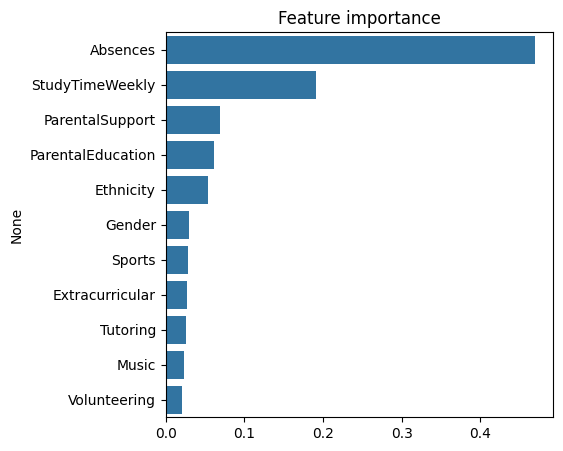

In [11]:
plt.figure(figsize=(5,5))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

In [12]:

!pip install mlflow


!pip install mlflow[pipelines] 
!conda install -c conda-forge mlflow-pipelines

!pip install mlflow[extras]

!pip install mlflow-skinny


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package mlflow-pipelines-1.28.0-py310h56eec8b_0 requires python >=3.10,<3.11.0a0, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ mlflow-pipelines is installable with the potential options
│  ├─ mlflow-pipelines [1.28.0|1.29.0|1.30.0] would require
│  │  └─ python >=3.10,<3.11.0a0 , which can be installed;
│  ├─ mlflow-pipelines [1.28.0|1.29.0|1.30.0] would require
│  │  └─ python >=3.7,<3.8.0a0 , which can be installed;
│  ├─ mlflow-pipelines [1.28.0|1.29.0|1.30

In [13]:
import mlflow

 
 
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("student-perform-experiment1")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/mlruns/5', creation_time=1719907459931, experiment_id='5', last_update_time=1719907459931, lifecycle_stage='active', name='student-perform-experiment1', tags={}>

In [14]:
experiment_name = "student-perform-experiment1"
experiment = mlflow.get_experiment_by_name(experiment_name)
 
if experiment:
    print(f"Experiment ID: {experiment.experiment_id}, Name: {experiment.name}")
else:
    print(f"No experiment found with name: {experiment_name}")

Experiment ID: 5, Name: student-perform-experiment1


In [15]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"XGBoost accuracy: {score:.2f}")

XGBoost accuracy: 0.67


In [16]:
with open("/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/models/XBGClassifier.bin", "wb") as f_out:
    pickle.dump((clf), f_out)

In [17]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"RandomForest accuracy: {score:.2f}")

RandomForest accuracy: 0.71


In [18]:
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Support Vector Machine accuracy: {score:.2f}")

Support Vector Machine accuracy: 0.75


In [55]:
experiment_id="5"
mlflow.set_experiment(experiment_id=experiment_id)

with mlflow.start_run():

    mlflow.set_tag("developer", "Kasi")

    mlflow.log_param("train-data-path", "/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/data/Student_performance_data _.csv")
    model = SVC()
    # Define evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # # Define grid
    grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }
    search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)
    result = search.fit(X_train, y_train)
    best_score = result.best_score_
    best_hyperparameters = result.best_params_
    print('Best Score:',best_score)
    print('Best Hyperparameters:',best_hyperparameters)

    mlflow.log_metric("best_score", best_score.real)
    for param_name, param_value in best_hyperparameters.items():
        mlflow.log_param(param_name, param_value)
    #mlflow.log_metric("best_hyperparameters", best_hyperparameters.real)

    mlflow.log_artifact(local_path="/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/models/XBGClassifier.bin", artifact_path="models_pickle")
    mlflow.sklearn.save_model(model, "my_model")
        #logging model to mlflow

Best Score: 0.751517961023851
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
import mlflow

from mlflow.tracking import MlflowClient


MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

run_id = "1fb93345ae594f129948c6da49ec5ecc"
model_uri = f"runs:/{run_id}/model"
mlflow.register_model(model_uri=model_uri, name="XGB_Student_Performance")

In [49]:

from mlflow.tracking import MlflowClient
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

model_name = "XGB_Student_Performance"
latest_versions = client.get_latest_versions(name=model_name)

for version in latest_versions:
    print(f"version: {version.version}, stage: {version.current_stage}")

version: 1, stage: None


/tmp/ipykernel_2015/4042388521.py:6: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_versions = client.get_latest_versions(name=model_name)


In [50]:
model_name = "XGB_Student_Performance"
model_version = 1
new_stage = "Staging"
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage=new_stage,
    archive_existing_versions=False
)

/tmp/ipykernel_2015/1285305762.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1719914743825, current_stage='Staging', description=None, last_updated_timestamp=1719917313788, name='XGB_Student_Performance', run_id='b555001087e5497daeadf3771db9aaf5', run_link=None, source='/workspaces/mlops-zoomcamp/env1/02-experiment-tracking/mlruns/5/b555001087e5497daeadf3771db9aaf5/artifacts/model-pickle', status='READY', status_message=None, tags={}, user_id=None, version=1>